In [38]:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#The two lines below are used for parsing the xml file for historical FX data
import urllib.request
import xml.etree.ElementTree as ET
# Get the "pandas datareader" package used for pulling down stock data
import pandas_datareader.data as web

# Return attribution
In this short example we will use Python and Jupyter to learn how to
    1. Get data (stock and foreign exchange rates from the web
    2. Perform ane elementary return attribution analysis of a single stock

## Downloading data from the web

### 1. Using the "datareader package" to download historical stock data from yahoo or google finance
Let us pick the US listed stock POT (which mines raw material for fertilizer) as an example:


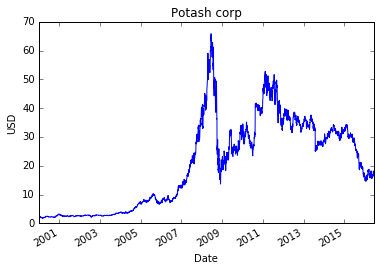

In [39]:
#Define start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 6, 14)
#Get stock data from yahoo or google using the datareader package
f = web.DataReader("POT", 'yahoo', start, end)
f['Adj Close'].plot(kind='line',title='Potash corp').set_ylabel("USD");

### 2. Using a more handcrafted method to get Forex data from the European central bank's web site
In this example we will download FX data from the ECB (European union's central bank)
use the ElementTree Python package to find and retrieve the observations in an orderly manner

In [40]:
#In this example we will download FX data from the ECB (European union's central bank)
# use the ElementTree Python package to find and retrieve the observations in an orderly manner

#Let's open a connection to the xml file on the web in preparation for scraping down the data
tree = ET.parse(urllib.request.urlopen('http://www.ecb.europa.eu/stats/exchange/eurofxref/html/usd.xml'))
doc = tree.getroot()

#print("doc[1][1].get('CURRENCY')");
#print(doc[1][1].get('CURRENCY'));

# Create a pandas data frame holding two numpy arrays
# having (approximately) sufficiently large size to hold the observations 
# (1999/Jan/4-2016/Jun/7 = 4464 rows). If too small more rows will be added automatically
numberOfRows = 4464

# create dataframe
df = pd.DataFrame(index=np.arange(0, numberOfRows), columns=('TIME_PERIOD','OBS_VALUE') )

# Use ElementTree to walk through all the children representing the FX rates
# and populate the data frame
# code for exploring the XML file included in the comments section below

obsNumber=0
walkAll = doc[1][1].iter()
for  elt in walkAll:
    df.loc[obsNumber]=[elt.attrib.get('TIME_PERIOD'),elt.attrib.get('OBS_VALUE')]
    obsNumber+=1

#print("obsNumber is: ",obsNumber)
#df.head()

#COMMENTS SECTION
#In order to explore the XML file it is best to open it in a text editor
#and then use statements as those below to understand its structure (have fun!)
#tree = ET.parse(urllib.request.urlopen('http://www.ecb.europa.eu/stats/exchange/eurofxref/html/usd.xml'))
#doc = tree.getroot()
#print("root:")
#print(doc)
#for child in doc:
#    print ("child:")
#    print(child.tag, child.attrib)
#print ('doc[0]')
#print(doc[0].attrib)
#print ('doc[1]')
#print(doc[1].attrib)
#print ('doc[1][1]')
#print(doc[1][1].attrib)
#print ('doc[1][1][0]')
#print(doc[1][1][0].attrib)
#print ('classdoc[1][1][0]')
#print(type(doc[1][1][0]))
#print("doc[1][1].get('CURRENCY')");
#print(doc[1][1].get('CURRENCY'));

In [41]:
#Let's clean up the dataframe as follows:
#convert string values to datetime and float
df['TIME_PERIOD']=pd.to_datetime(df['TIME_PERIOD'])
df['OBS_VALUE']=df['OBS_VALUE'].astype(float)
df.head()
#remove first line which is not an observation (it is the parent in the xml structure)
df=df.drop([0]);
#df.head()
# Use the datetime values as indexes
indexed_df = df.set_index(['TIME_PERIOD'])
#indexed_df.head()

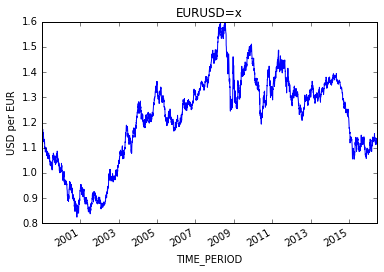

In [42]:
#plot the mofu
indexed_df['OBS_VALUE'].plot(kind='line',title='EURUSD=x').set_ylabel("USD per EUR");

## Return calculation and return attribution
We will take a look a the stock performance over the seven-year period: end of 2008 to end of 2015.

At the beginning of the period the price was USD 20.17 while at the end the price had fallen to USD 16.44 (i.e.-18.51 percent).

Let us now illustrate how the performance presents itself differently as measured in different currencies (USD or EUR).

In the calculations below we have chosen to decompose the returns into two factors: Stock and FX return. 

Of course you might chose to include other factors such as benchmark or sector indices in your calculations.


In [43]:
#f['2001-01']
startPriceUSD=f.loc['2008-12-31']['Adj Close']
endPriceUSD=f.loc['2015-12-31']['Adj Close']
startFXEURUSD=indexed_df.loc['2008-12-31']['OBS_VALUE']
endFXEURUSD=indexed_df.loc['2015-12-31']['OBS_VALUE']
startPriceEUR=startPriceUSD/startFXEURUSD
endPriceEUR=endPriceUSD/endFXEURUSD

print('Stock Price 2008-12-31 USD:',round(startPriceUSD,2),'EUR:',round(startPriceEUR,2))
print('Stock Price 2015-12-31 USD:',round(endPriceUSD,2),'EUR:',round(endPriceEUR,2))
print ('***Return data***')
print('Period Stock return in USD:',round((endPriceUSD/startPriceUSD-1)*100,2),'%')
print('Period Stock return in EUR:',round((endPriceEUR/startPriceEUR-1)*100,2),'%')
print ('***FX data***')
#print('EURUSD=x 2008-12-31:',startFXEURUSD)
#print('EURUSD=x 2015-12-31:',endFXEURUSD)
print('EURUSD return (positive means USD strenghtened):',round((startFXEURUSD/endFXEURUSD-1)*100,2),'%')
print('***Return decomposition***')
print('The period return (+4.17% ) from the perspective of a EUR based investor is composed of')
print('A LOSS on the underlying USD quoted stock of 18.51% and') 
print('a GAIN from a strengthening USD of 27.83% :')
print('**********')
print('Algebraically: 104.17% = (1-18.51%)x(1+27.83%)')

Stock Price 2008-12-31 USD: 20.17 EUR: 14.49
Stock Price 2015-12-31 USD: 16.44 EUR: 15.1
***Return data***
Period Stock return in USD: -18.51 %
Period Stock return in EUR: 4.17 %
***FX data***
EURUSD return (positive means USD strenghtened): 27.83 %
***Return decomposition***
The period return (+4.17% ) from the perspective of a EUR based investor is composed of
A LOSS on the underlying USD quoted stock of 18.51% and
a GAIN from a strengthening USD of 27.83% :
**********
Algebraically: 104.17% = (1-18.51%)x(1+27.83%)
